In [1]:
import json
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter 
from sklearn.metrics import f1_score 
from imblearn.under_sampling import ClusterCentroids
from sklearn.tree import DecisionTreeClassifier  
from sklearn import svm  
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score 
import xgboost as xgb 

In [2]:
df = pd.read_json('train.json')
df_test = pd.read_json('test.json')
df = pd.concat([df['user'].apply(pd.Series), df.drop('user', axis = 1)], axis = 1)
df_test = pd.concat([df_test['user'].apply(pd.Series), df_test.drop('user', axis = 1)], axis = 1)
df = df.drop('entities', axis = 1)
df_test = df_test.drop('entities', axis = 1)
print('drop NULL 100% column')
df = df.drop(['utc_offset','time_zone'], axis = 1)
df_test = df_test.drop(['utc_offset','time_zone'], axis = 1)
#去除所有缺失的列
df = df.drop([column_obj for column_obj in df.columns if "url" in column_obj or "color" in column_obj], axis = 1)
df_test = df_test.drop([column_obj for column_obj in df_test.columns if "url" in column_obj or "color" in column_obj], axis = 1)
#去除所有包含url的列

drop NULL 100% column


In [3]:
df.info() #展示数据信息，查看是否存在缺失值·

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            1986 non-null   int64              
 1   id_str                        1986 non-null   object             
 2   name                          1986 non-null   object             
 3   screen_name                   1986 non-null   object             
 4   location                      1986 non-null   object             
 5   description                   1986 non-null   object             
 6   protected                     1986 non-null   bool               
 7   followers_count               1986 non-null   int64              
 8   friends_count                 1986 non-null   int64              
 9   listed_count                  1986 non-null   int64              
 10  created_at                    1986 n

In [4]:
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
id                              0.0
id_str                          0.0
name                            0.0
screen_name                     0.0
location                        0.0
description                     0.0
protected                       0.0
followers_count                 0.0
friends_count                   0.0
listed_count                    0.0
created_at                      0.0
favourites_count                0.0
geo_enabled                     0.0
verified                        0.0
statuses_count                  0.0
lang                            0.0
contributors_enabled            0.0
is_translator                   0.0
is_translation_enabled          0.0
profile_background_tile         0.0
profile_use_background_image    0.0
has_extended_profile            0.0
default_profile                 0.0
default_profile_image           0.0
following                       0.0
follow_request_sent             0.0
notifications           

In [5]:
df = df.drop(['id','id_str','name','screen_name','created_at',
              'description','location','protected','follow_request_sent',
              'notifications','contributors_enabled'],axis=1)
df_test = df_test.drop(['id','id_str','name','screen_name','created_at',
              'description','location','protected','follow_request_sent',
              'notifications','contributors_enabled'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   followers_count               1986 non-null   int64 
 1   friends_count                 1986 non-null   int64 
 2   listed_count                  1986 non-null   int64 
 3   favourites_count              1986 non-null   int64 
 4   geo_enabled                   1986 non-null   bool  
 5   verified                      1986 non-null   bool  
 6   statuses_count                1986 non-null   int64 
 7   lang                          1986 non-null   object
 8   is_translator                 1986 non-null   bool  
 9   is_translation_enabled        1986 non-null   bool  
 10  profile_background_tile       1986 non-null   bool  
 11  profile_use_background_image  1986 non-null   bool  
 12  has_extended_profile          1986 non-null   bool  
 13  default_profile   

In [7]:
i = 0
dict_lang = {}
for obj in set(list(df["lang"])) :
    dict_lang[obj] = i
    i += 1
def fun_change(arg):
    if arg == True or arg == "regular" or arg == "human":
        return 1
    elif arg == False or arg == "none" or arg == "bot":
        return 0
    elif arg == "badged" :
        return -1
    else :
        return arg
def fun_change_lang(arg):
    if arg in dict_lang.keys():
        return dict_lang[arg]
    elif type(arg) == str :
        return -1
    else :
        return float(arg)
df = df.applymap(fun_change)
df_test = df_test.applymap(fun_change)
df = df.applymap(fun_change_lang)
df_test = df_test.applymap(fun_change_lang)

<AxesSubplot:>

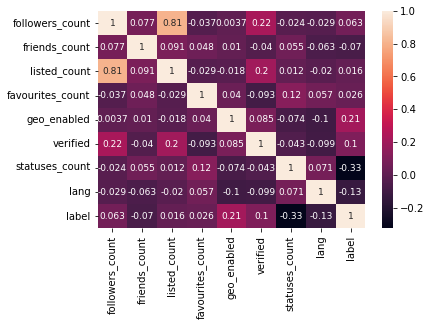

In [8]:
temp_df = df[["followers_count","friends_count","listed_count",
             "favourites_count","geo_enabled","verified","statuses_count","lang","label"]]
corr=temp_df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':9})

<AxesSubplot:>

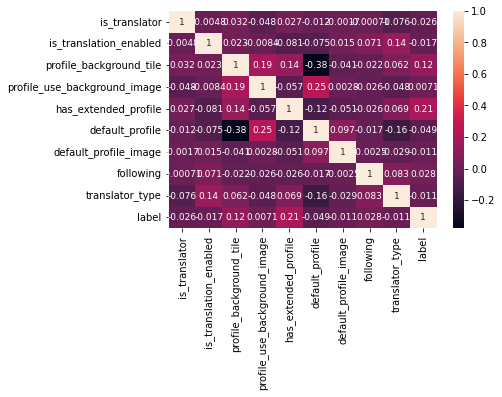

In [9]:
temp_df = df[["is_translator","is_translation_enabled","profile_background_tile","profile_use_background_image",
              "has_extended_profile","default_profile","default_profile_image","following","translator_type","label"]]
corr=temp_df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':9})

In [10]:
def neur_(chosen_list,data,n,m,max_iter_,k_fold) :
    kf = StratifiedKFold(n_splits = k_fold,random_state=2023,shuffle=True)
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    #oversample = RandomOverSampler(sampling_strategy=1) #过采样
    ave_f1_score=0
    k=0
    acc_aver=0
    list_pred_neur = []
    list_test_pred = []
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        #X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) #在X，y中进行过采样
        mlp=MLPClassifier(alpha=0, hidden_layer_sizes=(m, n), random_state=1,max_iter=max_iter_) #构造神经网络
        #mlp.fit(X_train_over,y_train_over) #利用训练集进行神经网络训练
        mlp.fit(X_train,y_train) #利用训练集进行神经网络训练
        y_pred = mlp.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [11]:
# neur_(["followers_count","friends_count","listed_count",
#        "favourites_count","geo_enabled","verified","statuses_count",
#        "lang","is_translator","is_translation_enabled","profile_background_tile",
#        "has_extended_profile","default_profile",
#        "default_profile_image","following","translator_type"],df,100,30,10000)
aver_neur,list_pred_neur,list_test_pred = neur_(["listed_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang",
       "has_extended_profile"],df,100,30,1000,5)
print(aver_neur)

Accuracy: 0.718593
F1-score: 0.765690
Accuracy: 0.758186
F1-score: 0.798319
Accuracy: 0.738035
F1-score: 0.783333
Accuracy: 0.795970
F1-score: 0.825806
Accuracy: 0.738035
F1-score: 0.772926
[0.7497639330152019, 0.7892150506877013]


In [12]:
def DecisionTree(chosen_list,data,k_fold) :
    kf = StratifiedKFold(n_splits = k_fold,random_state=2023,shuffle=True)
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    #oversample = RandomOverSampler(sampling_strategy=1) #过采样
    ave_f1_score=0
    k=0
    acc_aver=0
    list_pred_neur = []
    list_test_pred = []
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        #X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) #在X，y中进行过采样
        clf = DecisionTreeClassifier(random_state = 2023) 
        clf.fit(X_train,y_train) #利用训练集进行神经网络训练
        y_pred = clf.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [13]:
# clf_(["followers_count","friends_count","listed_count",
#        "favourites_count","geo_enabled","verified","statuses_count",
#        "lang","is_translator","is_translation_enabled","profile_background_tile",
#        "has_extended_profile","default_profile",
#        "default_profile_image","following","translator_type"],df,5)
aver_DecisionTree,list_pred_DecisionTree,list_test_pred = DecisionTree(
    [ "listed_count","favourites_count","geo_enabled","statuses_count"],df,5)
print(aver_DecisionTree)

Accuracy: 0.690955
F1-score: 0.724832
Accuracy: 0.695214
F1-score: 0.725624
Accuracy: 0.690176
F1-score: 0.726058
Accuracy: 0.735516
F1-score: 0.768212
Accuracy: 0.695214
F1-score: 0.729306
[0.7014151361340708, 0.7348064224431777]


In [14]:
def LogisticRegression_(chosen_list,data,k_fold) :
    kf = StratifiedKFold(n_splits = k_fold,random_state=2023,shuffle=True)
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    #oversample = RandomOverSampler(sampling_strategy=1) #过采样
    ave_f1_score=0
    k=0
    acc_aver=0
    list_pred_neur = []
    list_test_pred = []
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        #X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) #在X，y中进行过采样
        clf =  LogisticRegression()  
        clf.fit(X_train,y_train) #利用训练集进行神经网络训练
        y_pred = clf.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [15]:
aver_LogisticRegression,list_pred_LogisticRegression,list_test_pred = LogisticRegression_(["favourites_count","geo_enabled","verified","statuses_count",
       "is_translation_enabled","profile_background_tile",
       "has_extended_profile","following"],df,5)
print(aver_LogisticRegression)

Accuracy: 0.748744
F1-score: 0.793388
Accuracy: 0.765743
F1-score: 0.812877
Accuracy: 0.758186
F1-score: 0.808765
Accuracy: 0.775819
F1-score: 0.823062
Accuracy: 0.743073
F1-score: 0.789256
[0.7583129754566282, 0.8054696924276789]


In [16]:
def Svm_(chosen_list,data,k_fold) :
    kf = StratifiedKFold(n_splits = k_fold,random_state=2023,shuffle=True)
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    #oversample = RandomOverSampler(sampling_strategy=1) #过采样
    ave_f1_score=0
    k=0
    acc_aver=0
    list_pred_neur = []
    list_test_pred = []
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        #X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) #在X，y中进行过采样
        clf = svm.SVC(kernel='linear',random_state=32) # 使用线性核函数
        clf.fit(X_train,y_train) #利用训练集进行神经网络训练
        y_pred = clf.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [17]:
aver_Svm,list_pred_Svm,list_test_pred = Svm_([ "followers_count","friends_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang","is_translation_enabled","profile_background_tile",
       "has_extended_profile"],df,5)
print(aver_Svm)

Accuracy: 0.728643
F1-score: 0.782258
Accuracy: 0.760705
F1-score: 0.811881
Accuracy: 0.750630
F1-score: 0.804734
Accuracy: 0.768262
F1-score: 0.821012
Accuracy: 0.732997
F1-score: 0.785425
[0.7482475349037377, 0.8010619509623836]


In [18]:
def Xgboost_(chosen_list,data,k_fold) :
    kf = StratifiedKFold(n_splits = k_fold,random_state=2023,shuffle=True)
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    #oversample = RandomOverSampler(sampling_strategy=1) #过采样
    ave_f1_score=0
    k=0
    acc_aver=0
    list_pred_neur = []
    list_test_pred = []
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        #X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) #在X，y中进行过采样
        clf = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,  
                         max_depth=5, alpha=5, n_estimators=45,random_state=32)  
        clf.fit(X_train,y_train) #利用训练集进行神经网络训练
        y_pred = clf.predict(X_test) #利用预测集进行预测
        y_pred = [int(temp+0.5) for temp in y_pred]
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [19]:
aver_Xgboost,list_pred_Xgboost,list_test_pred = Xgboost_(["followers_count","friends_count","listed_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang","is_translator","is_translation_enabled","profile_background_tile",
       "has_extended_profile",
       "default_profile_image","following","translator_type"],df,5)
print(aver_Xgboost)

Accuracy: 0.768844
F1-score: 0.810700
Accuracy: 0.780856
F1-score: 0.820619
Accuracy: 0.778338
F1-score: 0.819672
Accuracy: 0.831234
F1-score: 0.862423
Accuracy: 0.753149
F1-score: 0.795833
[0.7824842094604003, 0.8218493215211767]


In [29]:
for i in range(5) :
    List_pred = []
    for j in range(len(list_pred_Svm[i])) :
        if(list_pred_Svm[i][j]+list_pred_Svm[i][j]+list_pred_LogisticRegression[i][j]+list_pred_DecisionTree[i][j]+list_pred_neur[i][j])>=3 :
            List_pred.append(1)
        else :
            List_pred.append(0)
    print(accuracy_score(List_pred,list_test_pred[i]))

0.7336683417085427
0.7707808564231738
0.7632241813602015
0.7732997481108312
0.7455919395465995


In [23]:
list_test_pred[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.